In [1]:
'''
Предметная область:
Гибель Титаника – одно из самых печально известных кораблекрушений в истории.

15 апреля 1912 года во время своего первого плавания считавшийся «непотопляемым» «Титаник» затонул
после столкновения с айсбергом. К сожалению, спасательных шлюпок для всех находившихся на борту не хватило, 
в результате чего погибли 1502 из 2224 пассажиров и членов экипажа.

Хотя в выживании присутствовал некоторый элемент удачи, похоже, 
что у некоторых групп людей было больше шансов выжить, чем у других.

Источник данных:
https://github.com/awesomedata/awesome-public-datasets

Краткое описание датасета:
Survived - тип данных: числовой - выжившие (0 - не выжил, 1 - выжил) 
Pclass - тип данных: числовой - класс билета (1 - первый, 2 - второй, 3 - третий)
Sex - тип данных: строковый - пол
Age - тип данных: числовой - возраст
SibSp - тип данных: числовой - количество братьев/сестер/супругов на борту Титаника
Parch - тип данных: числовой - количество родителей/детей на борту Титаника
Ticket - тип данных: строковый - номер билета
Fare - тип данных: числовой - пассажирский тариф
Cabin - тип данных: строковый - номер каюты
Embarked - порт погрузки (C = Шербур, Q = Квинстаун, S = Саутгемптон)

pclass : показатель социально-экономического статуса (SES).
1-й = верхний
2-й = средний
3-й = нижний
возраст : возраст является дробным, если меньше 1. Если возраст оценивается, он имеет форму xx.5
sibsp : набор данных определяет семейные отношения таким образом:
Брат, сестра, сводный брат, сводная сестра
Супруг = муж, жена (любовницы и невесты не учитывались)
parch : Набор данных определяет семейные отношения таким образом:
Родитель = мать, отец
Ребенок = дочь, сын, падчерица, пасынок
Некоторые дети путешествовали только с няней, поэтому для них parch=0.

Цель:   познакомиться с методом кластеризации K-mean 
        с помощью пакета sklearn. 

Задачи:
1) Добавить новый атрибут к датасету
2) "Причесать" датасет:
    --Удалить выбросы и дубли
    --Обработать пропущенные значения
    --Найти кривые данные
3) Построить графики зависимости одной переменной от другой. 
   Описать получившиеся кластеры
   Построить несколько разных графиков, найти ярковыраженные группы
4) Попробовать применить метод KMeans к текущему датасету
5) Написать выводы
'''

'\nПредметная область:\nГибель Титаника – одно из самых печально известных кораблекрушений в истории.\n\n15 апреля 1912 года во время своего первого плавания считавшийся «непотопляемым» «Титаник» затонул\nпосле столкновения с айсбергом. К сожалению, спасательных шлюпок для всех находившихся на борту не хватило, \nв результате чего погибли 1502 из 2224 пассажиров и членов экипажа.\n\nХотя в выживании присутствовал некоторый элемент удачи, похоже, \nчто у некоторых групп людей было больше шансов выжить, чем у других.\n\nИсточник данных:\nhttps://github.com/awesomedata/awesome-public-datasets\n\nКраткое описание датасета:\nSurvived - тип данных: числовой - выжившие (0 - не выжил, 1 - выжил) \nPclass - тип данных: числовой - класс билета (1 - первый, 2 - второй, 3 - третий)\nSex - тип данных: строковый - пол\nAge - тип данных: числовой - возраст\nSibSp - тип данных: числовой - количество братьев/сестер/супругов на борту Титаника\nParch - тип данных: числовой - количество родителей/детей на

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
_data = pd.read_csv('titanic.csv')
_data.head(30)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
26           27         0       3   
27           28         0       1   
28           29         1       3   
29           30         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   
20                               Fynney, Mr. Joseph J    male  35.0      0   
21                              Beesley, Mr. Lawrence    male  34.0      0   
22                        McGowan, Miss. Anna "Annie"  female  15.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   
24                      Palsson, Miss. Torborg Danira  female   8.0      3   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
26                            Emir, Mr. Farred Chehab    male   NaN      0   
27                     Fortune, Mr. Charles Alexander    male  19.0      3   
28                      O'Dwyer, Miss. Ellen "Nellie"  female   NaN      0   
29                                Todoroff, Mr. Lalio    male   NaN      0   

    Parch            Ticket      Fare        Cabin Embarked  
0       0         A/5 21171    7.2500          NaN        S  
1       0          PC 17599   71.2833          C85        C  
2       0  STON/O2. 3101282    7.9250          NaN        S  
3       0            113803   53.1000         C123        S  
4       0            373450    8.0500          NaN        S  
5       0            330877    8.4583          NaN        Q  
6  

In [4]:
#Добавляем новый атрибут "BirthYear" - год рождения пассажира (тип данных: числовой)
def BirthYear(row):
    return 1912.0 - row['Age']
_data['BirthYear'] = _data.apply(BirthYear, axis=1)
_data.head(30)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
26           27         0       3   
27           28         0       1   
28           29         1       3   
29           30         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   
20                               Fynney, Mr. Joseph J    male  35.0      0   
21                              Beesley, Mr. Lawrence    male  34.0      0   
22                        McGowan, Miss. Anna "Annie"  female  15.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   
24                      Palsson, Miss. Torborg Danira  female   8.0      3   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
26                            Emir, Mr. Farred Chehab    male   NaN      0   
27                     Fortune, Mr. Charles Alexander    male  19.0      3   
28                      O'Dwyer, Miss. Ellen "Nellie"  female   NaN      0   
29                                Todoroff, Mr. Lalio    male   NaN      0   

    Parch            Ticket      Fare        Cabin Embarked  BirthYear  
0       0         A/5 21171    7.2500          NaN        S     1890.0  
1       0          PC 17599   71.2833          C85        C     1874.0  
2       0  STON/O2. 3101282    7.9250          NaN        S     1886.0  
3       0            113803   53.1000         C123        S     1877.0  
4       0            373450    8.0500          NaN        S     1877.0  

<Axes: >

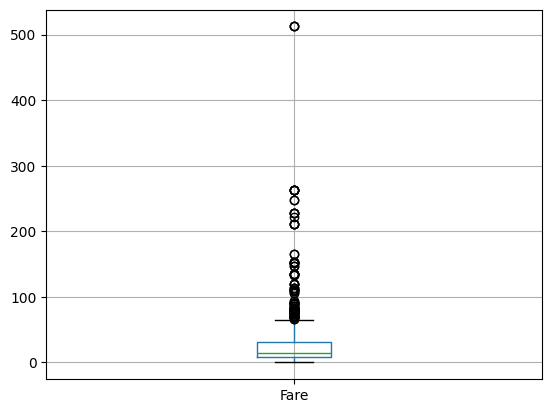

In [5]:
'''В лабораторной работе было выявлено,
    что выброс есть в столбце Fare. 
    Построим коробчатую диаграмму, чтобы в этом убедиться'''
_data.boxplot(column=['Fare'])


In [6]:
#Заменим этот выброс на стреднее значение атрибута
m = round(_data['Fare'].mean(),4)
print(_data[(_data['Fare']>500)])
_data.loc[_data['Fare']>500, ['Fare']] = m

     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  \
258  female  35.0      0      0  PC 17755  512.3292          NaN        C   
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
737    male  35.0      0      0  PC 17755  512.3292         B101        C   

     BirthYear  
258     1877.0  
679     1876.0  
737     1877.0  


In [7]:
#Найдем строки с повторяющимся PassengerId
_newData = _data.drop('PassengerId', axis=1).drop_duplicates()
print(_data.shape)
print(_newData.shape)

(891, 13)
(891, 12)


In [8]:
#Дубликатов по PassengerId не обнаружено. Попробуем найти дубликаты по ключевым полям.
key = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'BirthYear']
_data.fillna(-999).groupby(key)['PassengerId'].count().sort_values(ascending=False).head(20)
#Повторяющиеся значения не найдены, так что двигаемся дальше 

Pclass  Name                                               Sex     Age     SibSp  Parch  Ticket              BirthYear
1       Allen, Miss. Elisabeth Walton                      female   29.0   0      0      24160                1883.0      1
3       Johansson, Mr. Karl Johan                          male     31.0   0      0      347063               1881.0      1
        Jalsevac, Mr. Ivan                                 male     29.0   0      0      349240               1883.0      1
        Jansson, Mr. Carl Olof                             male     21.0   0      0      350034               1891.0      1
        Jardin, Mr. Jose Neto                              male    -999.0  0      0      SOTON/O.Q. 3101305  -999.0       1
        Jensen, Mr. Hans Peder                             male     20.0   0      0      350050               1892.0      1
        Jensen, Mr. Niels Peder                            male     48.0   0      0      350047               1864.0      1
        Jense

In [9]:
print('Количество пропущенных значений:')
print(_data.isnull().sum())
"""Пропущенные значения есть в столбцах Age, BirthYear, Embarked и Cabin.
    Столбец Age можно заполнить медианой, а BirthYear высчитывается по столбцу Age.
    В столбце Cabin больше половины пропущенных значений и восстановить их не является возможным.
    Удалим столбец Cabin.
    Два пропущенных значения в Embraked можно заполнить наиболее повторяющимся"""

Количество пропущенных значений:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
BirthYear      177
dtype: int64


'Пропущенные значения есть в столбцах Age, BirthYear, Embarked и Cabin.\n    Столбец Age можно заполнить медианой, а BirthYear высчитывается по столбцу Age.\n    В столбце Cabin больше половины пропущенных значений и восстановить их не является возможным.\n    Удалим столбец Cabin.\n    Два пропущенных значения в Embraked можно заполнить наиболее повторяющимся'

In [10]:
del _data['Cabin']
med = round(_data['Age'].median(),0)
_data['Age'] = _data['Age'].fillna(med)
_data['BirthYear'] = _data['BirthYear'].fillna(1912.0 - _data['Age'])

C_count = len(_data[(_data['Embarked'] == 'C')])
Q_count = len(_data[(_data['Embarked'] == 'Q')])*2
S_count = len(_data[(_data['Embarked'] == 'S')])*3
res = round((C_count + Q_count + S_count) / len(_data['Embarked']), 0)
if res == 1:
    _data['Embarked'] = _data['Embarked'].fillna('C')
elif res == 2:
    _data['Embarked'] = _data['Embarked'].fillna('Q')
elif res == 3:
    _data['Embarked'] = _data['Embarked'].fillna('S')

print(_data.isnull().sum())
_data.head(30)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
BirthYear      0
dtype: int64


PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   
20           21         0       2   
21           22         1       2   
22           23         1       3   
23           24         1       1   
24           25         0       3   
25           26         1       3   
26           27         0       3   
27           28         0       1   
28           29         1       3   
29           30         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male  28.0      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male  28.0      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female  28.0      0   
20                               Fynney, Mr. Joseph J    male  35.0      0   
21                              Beesley, Mr. Lawrence    male  34.0      0   
22                        McGowan, Miss. Anna "Annie"  female  15.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   
24                      Palsson, Miss. Torborg Danira  female   8.0      3   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
26                            Emir, Mr. Farred Chehab    male  28.0      0   
27                     Fortune, Mr. Charles Alexander    male  19.0      3   
28                      O'Dwyer, Miss. Ellen "Nellie"  female  28.0      0   
29                                Todoroff, Mr. Lalio    male  28.0      0   

    Parch            Ticket      Fare Embarked  BirthYear  
0       0         A/5 21171    7.2500        S     1890.0  
1       0          PC 17599   71.2833        C     1874.0  
2       0  STON/O2. 3101282    7.9250        S     1886.0  
3       0            113803   53.1000        S     1877.0  
4       0            373450    8.0500        S     1877.0  
5       0            330877    8.4583        Q     1884.0  
6       0        

' \nЯрковыраженные группы можно заметить на следующих графиках:\n-- SibSp от Age\n    до 20 лет: пассажиры в этом возрасте имеют больше братьев/сестер/супругов на борту\n    от 20 до 55: пассажиры в этом возрасте имеют среднее количество братьев/сестер/супругов на борту\n    после 55: пассажиры в этом возрасте имеют малое количество братьев/сестер/супругов на борту или не имеют вовсе\n-- Parch от Age\n    до 35 лет: пассажиры в этом возрасте больше склонны путешетсвовать с родителями/детьми\n    после 35 лет: пассажиры склонны путешествовать в одиночестве\n'

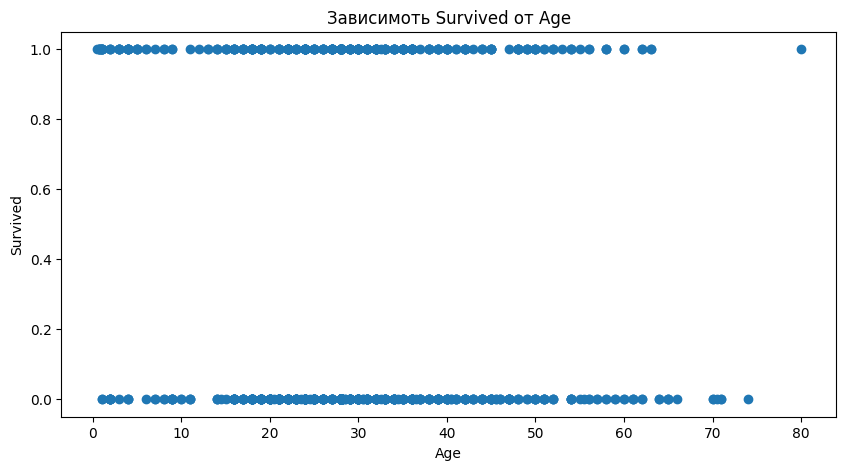

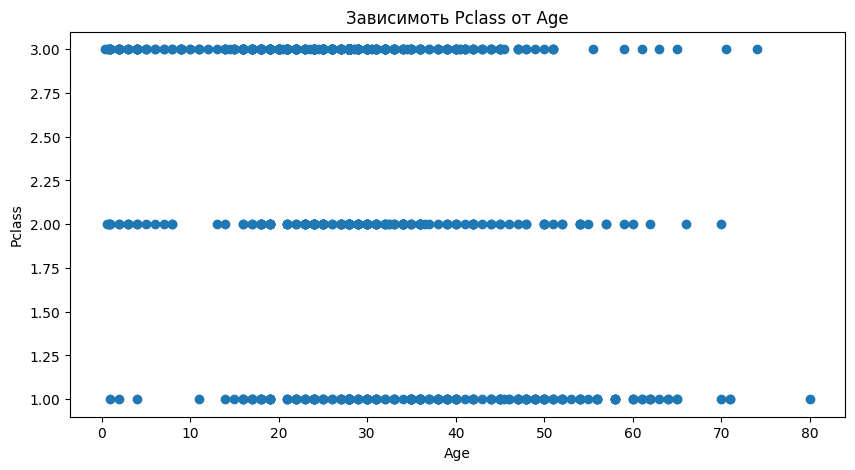

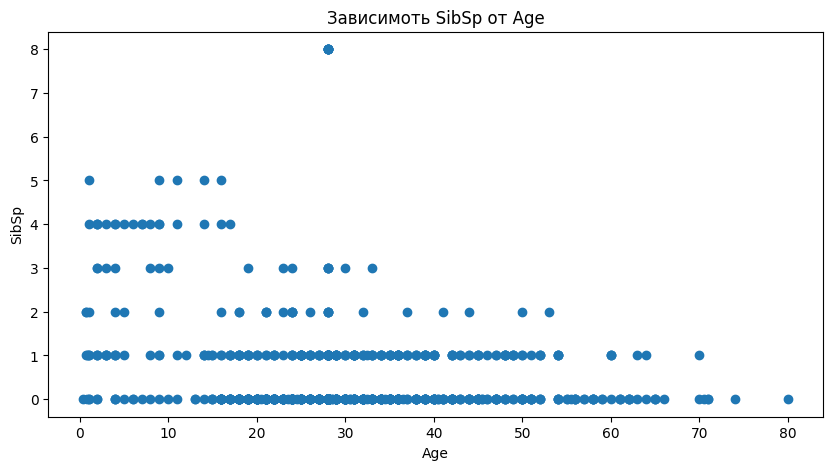

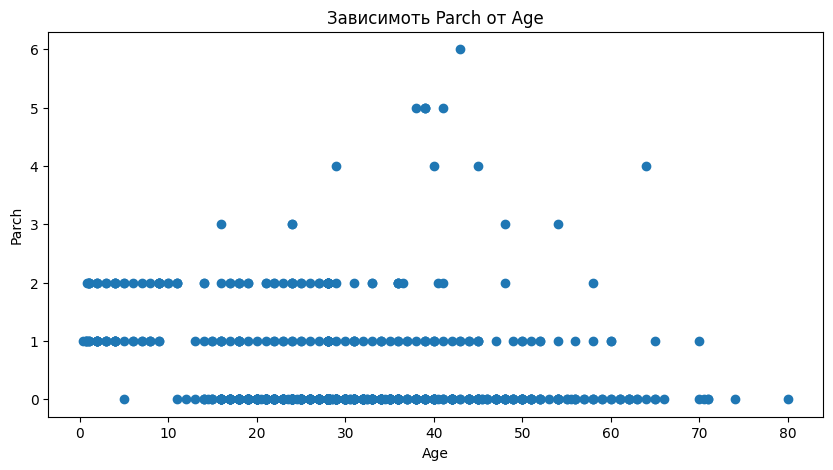

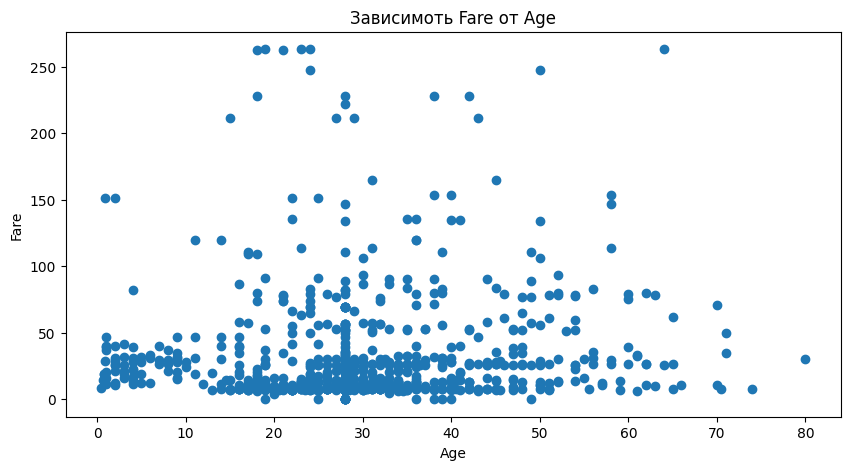

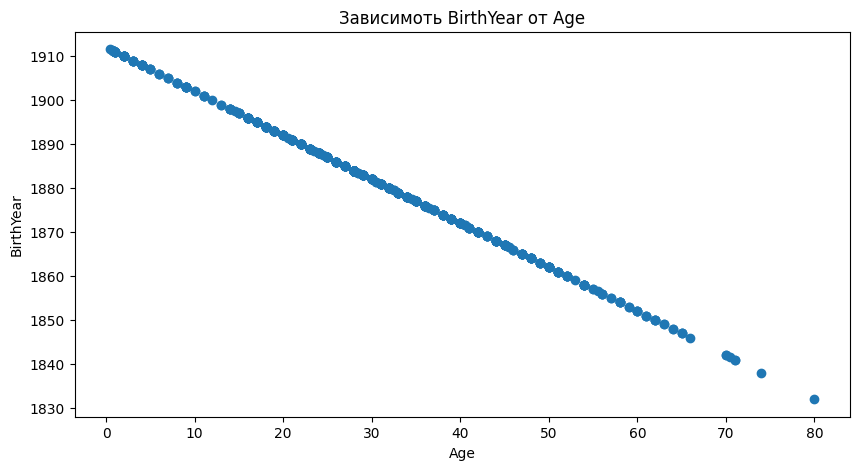

In [11]:
s = ['Survived','Pclass','SibSp','Parch','Fare', 'BirthYear']
#Рассмотрим графики зависимости числовых переменных от переменной Age
for i in range(0, len(s)):
    num1 = s[i]
    plt.figure(figsize=(10,5))
    plt.scatter(_data['Age'], _data[num1])
    plt.xlabel('Age')
    plt.ylabel(num1)
    plt.title('Зависимоть '+num1 +' от Age')
    
""" 
Ярковыраженные группы можно заметить на следующих графиках:
-- SibSp от Age
    до 20 лет: пассажиры в этом возрасте имеют больше братьев/сестер/супругов на борту
    от 20 до 55: пассажиры в этом возрасте имеют среднее количество братьев/сестер/супругов на борту
    после 55: пассажиры в этом возрасте имеют малое количество братьев/сестер/супругов на борту или не имеют вовсе
-- Parch от Age
    до 35 лет: пассажиры в этом возрасте больше склонны путешетсвовать с родителями/детьми
    после 35 лет: пассажиры склонны путешествовать в одиночестве
"""          



'\nПри переходе от 3 до 4 класстеров значение WCSS перестало \nзначительно уменьшаться на всех графиках\nСоответственно, оптимальное знание равно 3 для всех зависимостей\n\n'

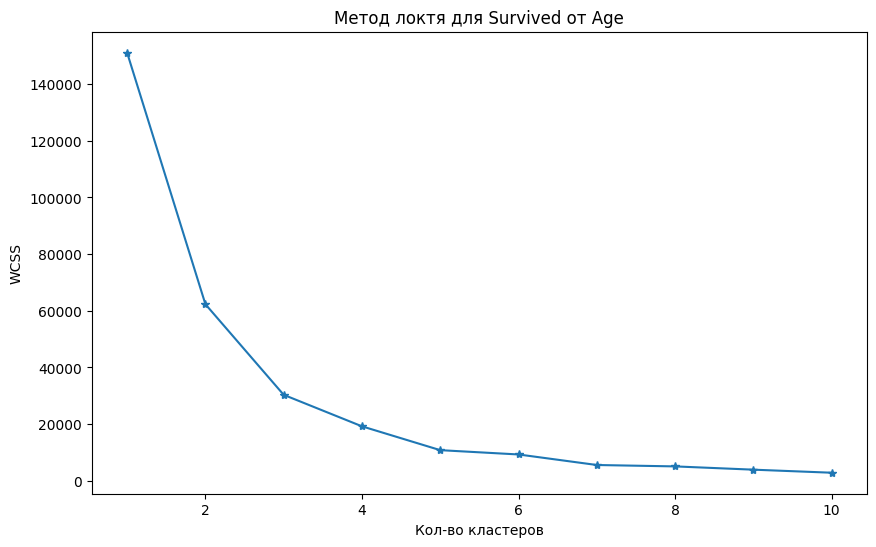

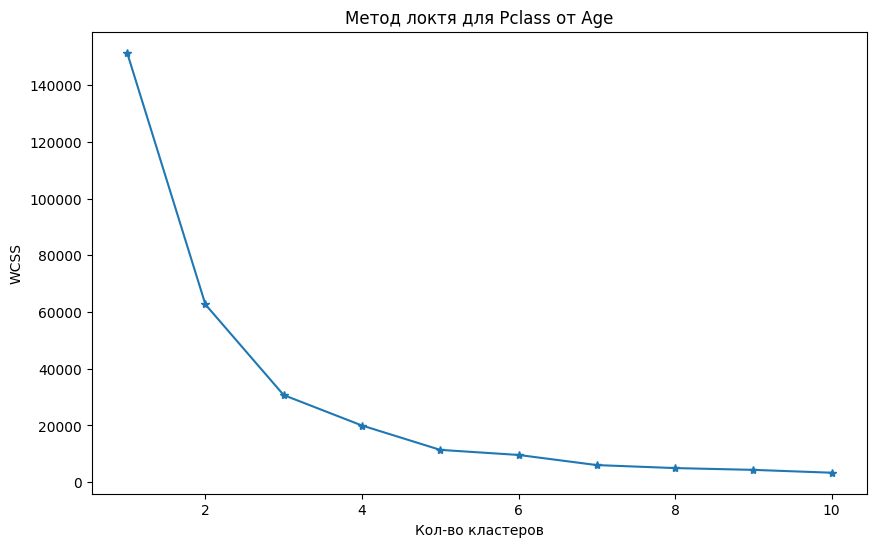

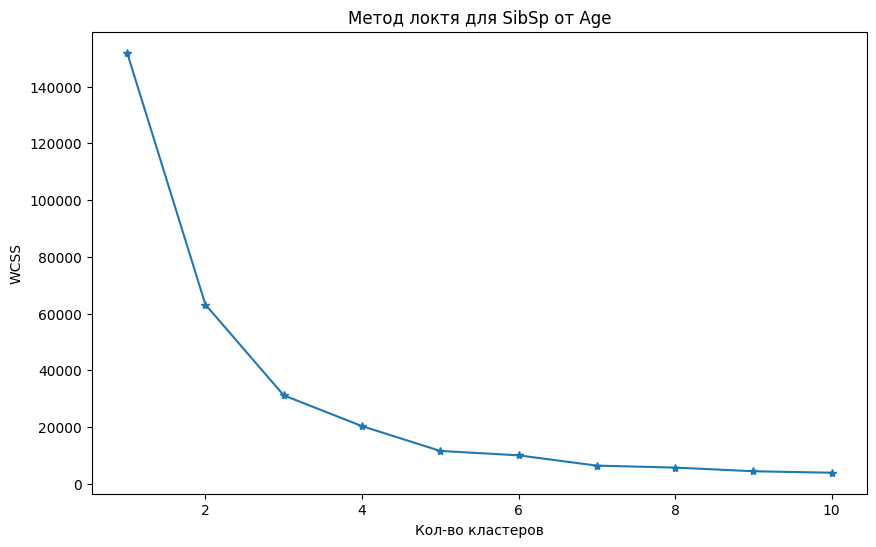

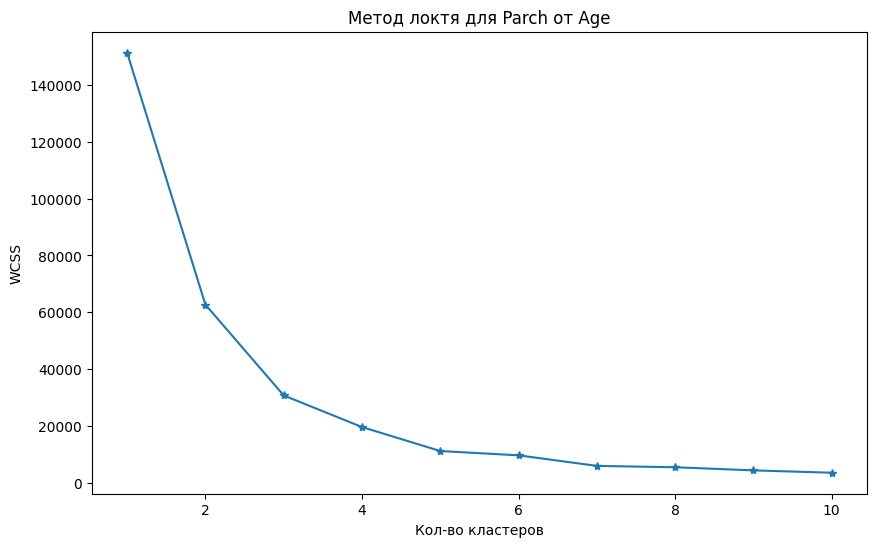

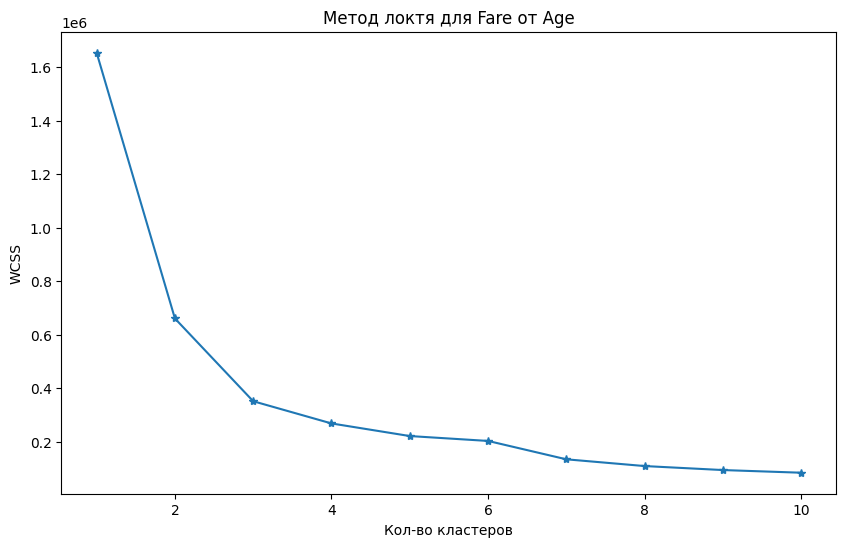

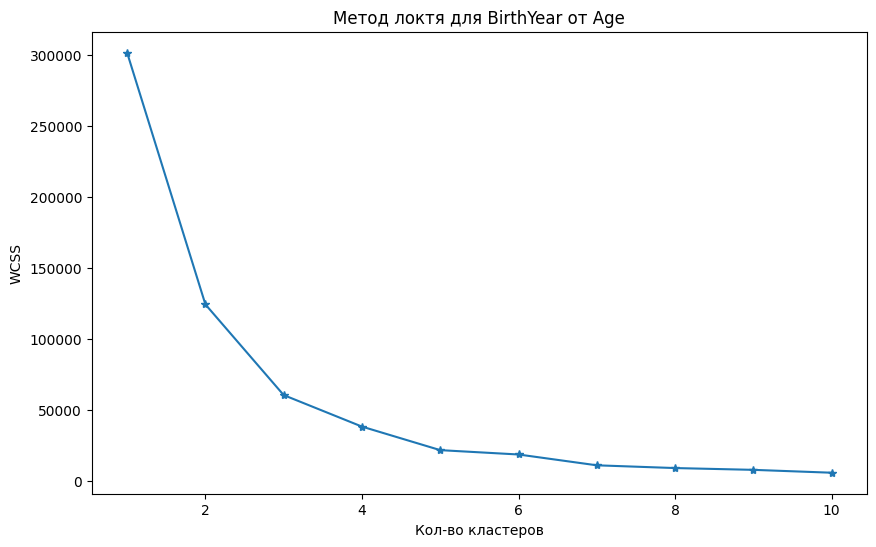

In [28]:
#Используем метод локтя, чтобы выбрать оптимальное количество кластеров

#Пустой список для записи показателя WCSS
wcss = []
for i in range(1,11):
    _km = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(_data[['Age', 'Survived']])
    wcss.append(_km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker="*")
plt.title('Метод локтя для Survived от Age')
plt.xlabel('Кол-во кластеров')
plt.ylabel('WCSS')

wcss = []
for i in range(1,11):
    _km = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(_data[['Age', 'Pclass']])
    wcss.append(_km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker="*")
plt.title('Метод локтя для Pclass от Age')
plt.xlabel('Кол-во кластеров')
plt.ylabel('WCSS')

wcss = []
for i in range(1,11):
    _km = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(_data[['Age', 'SibSp']])
    wcss.append(_km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker="*")
plt.title('Метод локтя для SibSp от Age')
plt.xlabel('Кол-во кластеров')
plt.ylabel('WCSS')

wcss = []
for i in range(1,11):
    _km = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(_data[['Age', 'Parch']])
    wcss.append(_km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker="*")
plt.title('Метод локтя для Parch от Age')
plt.xlabel('Кол-во кластеров')
plt.ylabel('WCSS')

wcss = []
for i in range(1,11):
    _km = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(_data[['Age', 'Fare']])
    wcss.append(_km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker="*")
plt.title('Метод локтя для Fare от Age')
plt.xlabel('Кол-во кластеров')
plt.ylabel('WCSS')

wcss = []
for i in range(1,11):
    _km = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(_data[['Age', 'BirthYear']])
    wcss.append(_km.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker="*")
plt.title('Метод локтя для BirthYear от Age')
plt.xlabel('Кол-во кластеров')
plt.ylabel('WCSS')


"""
При переходе от 3 до 4 класстеров значение WCSS перестало 
значительно уменьшаться на всех графиках
Соответственно, оптимальное знание равно 3 для всех зависимостей

"""

Text(0.5, 1.0, 'Зависимоть BirthYear от Age')

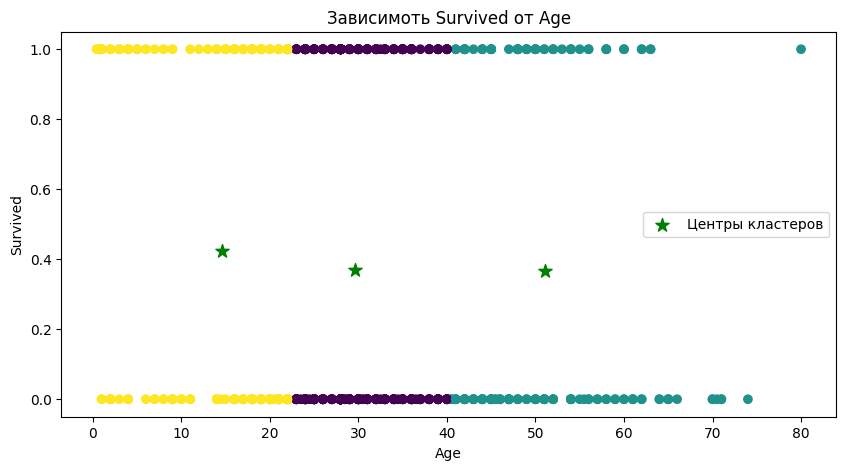

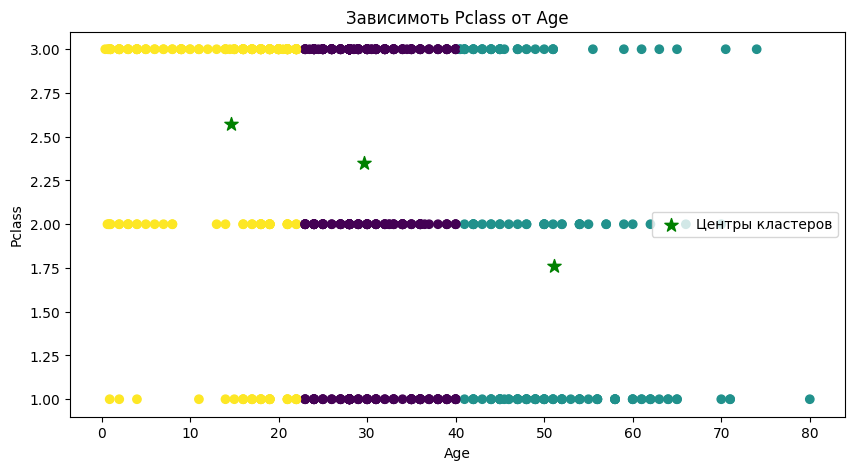

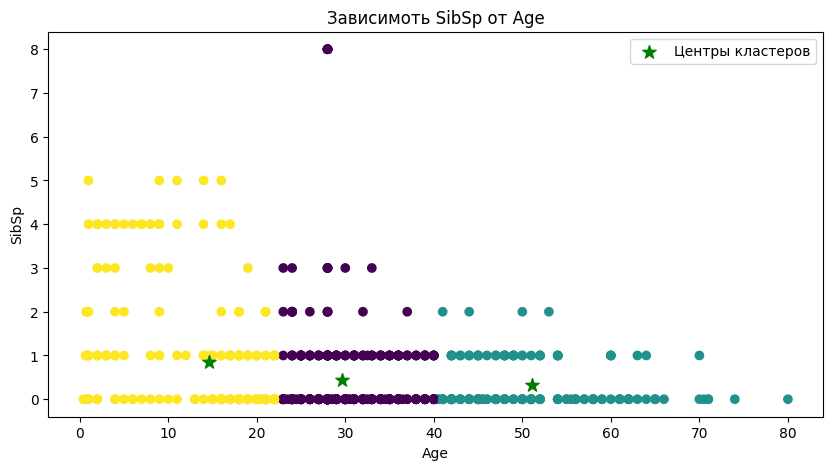

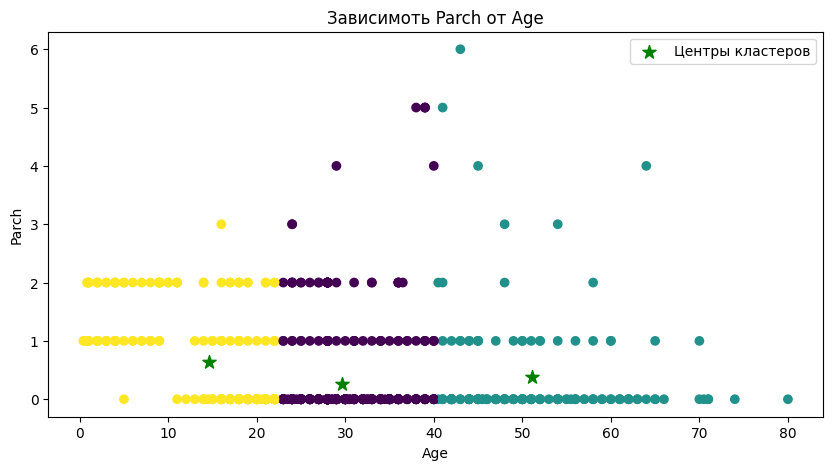

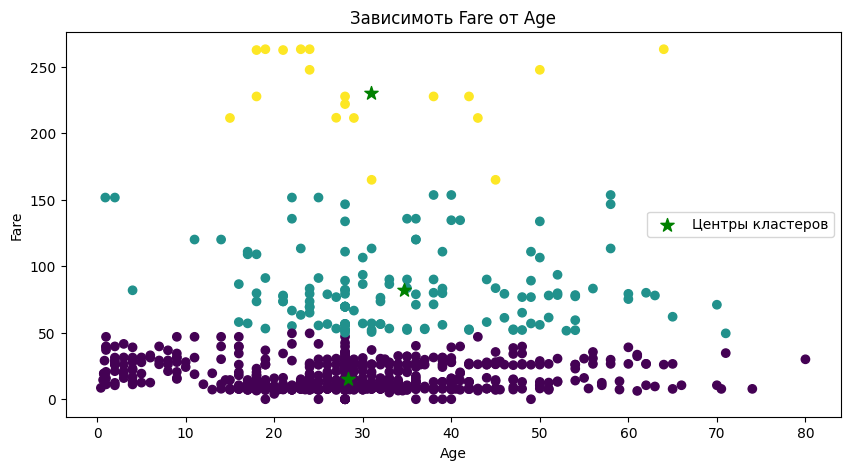

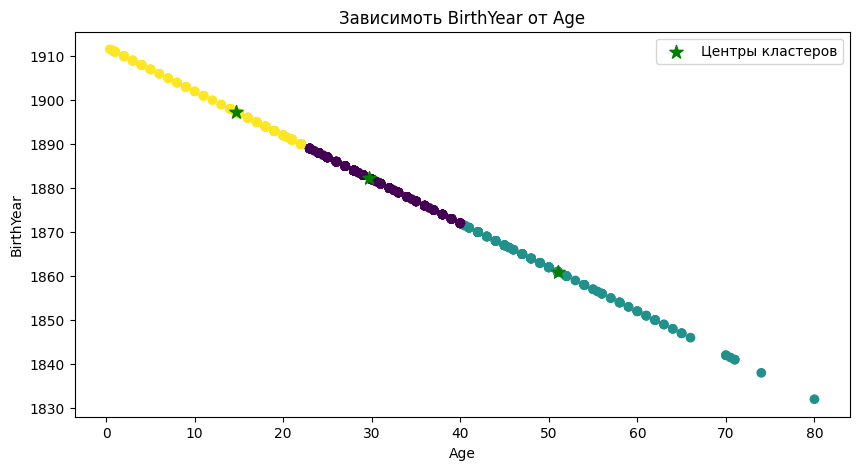

In [29]:
#Применим метод kMeans к датасету

#Рассмотрим графики зависимости числовых переменных от переменной Age
_km = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(_data[['Age', 'Survived']])
_lab = _km.labels_
_cent = _km.cluster_centers_
plt.figure(figsize=(10,5))
plt.scatter(_data['Age'], _data['Survived'], c = _lab)
plt.scatter(_cent[:, 0], _cent[:, 1], c='green', marker='*', s=100, label='Центры кластеров')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.legend()
plt.title('Зависимоть Survived от Age')

_km = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(_data[['Age', 'Pclass']])
_lab = _km.labels_
_cent = _km.cluster_centers_
plt.figure(figsize=(10,5))
plt.scatter(_data['Age'], _data['Pclass'], c = _lab)
plt.scatter(_cent[:, 0], _cent[:, 1], c='green', marker='*', s=100, label='Центры кластеров')
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.legend()
plt.title('Зависимоть Pclass от Age')


_km = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(_data[['Age', 'SibSp']])
_lab = _km.labels_
_cent = _km.cluster_centers_
plt.figure(figsize=(10,5))
plt.scatter(_data['Age'], _data['SibSp'], c = _lab)
plt.scatter(_cent[:, 0], _cent[:, 1], c='green', marker='*', s=100, label='Центры кластеров')
plt.xlabel('Age')
plt.ylabel('SibSp')
plt.legend()
plt.title('Зависимоть SibSp от Age')

_km = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(_data[['Age', 'Parch']])
_lab = _km.labels_
_cent = _km.cluster_centers_
plt.figure(figsize=(10,5))
plt.scatter(_data['Age'], _data['Parch'], c = _lab)
plt.scatter(_cent[:, 0], _cent[:, 1], c='green', marker='*', s=100, label='Центры кластеров')
plt.xlabel('Age')
plt.ylabel('Parch')
plt.legend()
plt.title('Зависимоть Parch от Age')

_km = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(_data[['Age', 'Fare']])
_lab = _km.labels_
_cent = _km.cluster_centers_
plt.figure(figsize=(10,5))
plt.scatter(_data['Age'], _data['Fare'], c = _lab)
plt.scatter(_cent[:, 0], _cent[:, 1], c='green', marker='*', s=100, label='Центры кластеров')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.title('Зависимоть Fare от Age')

_km = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(_data[['Age', 'BirthYear']])
_lab = _km.labels_
_cent = _km.cluster_centers_
plt.figure(figsize=(10,5))
plt.scatter(_data['Age'], _data['BirthYear'], c = _lab)
plt.scatter(_cent[:, 0], _cent[:, 1], c='green', marker='*', s=100, label='Центры кластеров')
plt.xlabel('Age')
plt.ylabel('BirthYear')
plt.legend()
plt.title('Зависимоть BirthYear от Age')

In [30]:
"""
Вывод:
Во время проведения данной лабораторной работы был изучен 
метод кластеризации KMeans и применен на практике. В датасет был добавлен новый атрибут, данные в котором
вычисленны на основе данных датасета. Датасет был "приведен в поряок" путем удаления выбросов
и обработки пропущенных значений. Были построенны и рассмотрены графики зависимостей
числовых переменных датасета от атрибута Age. Было предположено, что:
-- На графике зависимости SibSp от Age три группы: до 20, после 20 до 55, после 55
-- На графике зависимости Parch от Age две группы: до 35, после 35
Для опеределения оптимального количества кластеров был применен метод локтя.
После применения метода локтя и метода kMeans оказалось, 
что по первому и второму предположению группы следующие: до 22, от 22 до 40, от 40. 
"""

'\nВывод:\nВо время проведения данной лабораторной работы был изучен \nметод кластеризации KMeans и применен на практике. В датасет был добавлен новый атрибут, данные в котором\nвычисленны на основе данных датасета. Датасет был "приведен в поряок" путем удаления выбросов\nи обработки пропущенных значений. Были построенны и рассмотрены графики зависимостей\nчисловых переменных датасета от атрибута Age. Было предположено, что:\n-- На графике зависимости SibSp от Age три группы: до 20, после 20 до 55, после 55\n-- На графике зависимости Parch от Age две группы: до 35, после 35\nДля опеределения оптимального количества кластеров был применен метод локтя.\nПосле применения метода локтя и метода kMeans оказалось, \nчто по первому и второму предположению группы следующие: до 22, от 22 до 40, от 40. \n'